# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

### 1. What test is appropriate for this problem? Does CLT apply?
    
    Our quest is find if race has any impact on receiving first call.
    
    Our Approach :
                - Verify if there is a significant difference in mean b/w white applicant and black applicant.
                
    Implementation : 
                - Filter samples and create one for white applicants and other for black applicants.
                - perform two sample t-test hypothesis.
    
###### CLT does apply as we are comparing means of samples. 

### 2. What are the null and alternate hypotheses?

     - H0 (Null Hypothesis) : Mean of white applicant is same as Mean of black applicants. ( mean of black pop = mean of white pop )
     - Ha (Alternative Hypothesis) : Mean of white applicant is different from Mean of black applicants. ( mean of black pop != mean of white pop )


In [3]:
#3. Compute margin of error, confidence interval, and p-value.

# Vital stats for call column of WHITE applicants 
white_app = data[(data.race=='w')]
white_app_sample_size= len(white_app)
white_app_sample_mean = np.mean(white_app.call)
white_app_sample_std = np.std(white_app.call)

# Vital stats for call column of BLACK applicants 
black_app = data[(data.race=='b')]
black_app_sample_size = len(black_app)
black_app_sample_mean = np.mean(black_app.call)
black_app_sample_std = np.std(black_app.call)

# ref. http://www.stat.ucla.edu/~cochran/stat10/winter/lectures/lect21.html
z_value = ((white_app_sample_mean - black_app_sample_mean) - 0 ) \
            / np.sqrt((white_app_sample_std/white_app_sample_size) + (black_app_sample_std/black_app_sample_size))
print(z_value)

# critical value from z-table for z_value with 95% confidence interval.
z_critical_value = 1.960

2.14927237595


<p> 
    <b>Reject H0 if abs(z_value) > z_critical_value</b>  <br> </br>
    As z_value falls beyond z_critical_value reject H0: differnce b/w means is same. <br> </br>
</p>

#### White applicants are more likely receive call compared to Black applicants.

In [4]:
### Vitial information. 
### Margin of Error : margin_of_error = (mean X1- mean X2) +-Z(95% Conf. In.) * SE(X1-X2)
standard_error = np.sqrt((np.square(white_app_sample_std)/white_app_sample_size)+ \
                         np.square(black_app_sample_std) /black_app_sample_size)

### reference : http://www.kean.edu/~fosborne/bstat/06b2means.html

In [5]:
# Confidence interval  standard_error
upper_limit = (white_app_sample_mean - black_app_sample_mean) + z_critical_value * standard_error
lower_limit = (white_app_sample_mean - black_app_sample_mean) - z_critical_value * standard_error

In [6]:
# With 95% Confidence real population mean lies b/w  
print(lower_limit)
print(upper_limit)

0.0167774481462
0.0472882615639


    We experimented with statiscal signifance of 5%(alpha)
    This value signifies tolerance level, i.e. possibility of rejecting null hypothesis when it is acually true.
    In Current scenario: we can read as our tolerance for Type I error (rejecting null hypothesis when it is true). 
    when there is actaul difference in mean but we accept as no difference. 

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 100):
    print(data.head(1))

  id ad  education  ofjobs  yearsexp  honors  volunteer  military  empholes  \
0  b  1          4       2         6       0          0         0         1   

   occupspecific  occupbroad  workinschool  email  computerskills  \
0             17           1             0      0               1   

   specialskills firstname sex race    h    l  call city kind   adid  \
0              0   Allison   f    w  0.0  1.0   0.0    c    a  384.0   

   fracblack  fracwhite  lmedhhinc  fracdropout  fraccolp      linc  col  \
0    0.98936     0.0055   9.527484     0.274151  0.037662  8.706325  1.0   

  expminreq schoolreq  eoe  parent_sales  parent_emp  branch_sales  \
0         5            1.0           NaN         NaN           NaN   

   branch_emp  fed  fracblack_empzip  fracwhite_empzip  lmedhhinc_empzip  \
0         NaN  NaN               NaN               NaN               NaN   

   fracdropout_empzip  fraccolp_empzip  linc_empzip  manager  supervisor  \
0                 NaN             

In [11]:
# Convert from catogorical value to numerical value for race and sex.
data['sex'].replace('f',0,inplace=True)
data['sex'].replace('m',1, inplace=True)

data['race'].replace('w',0,inplace=True)
data['race'].replace('b',1,inplace=True)

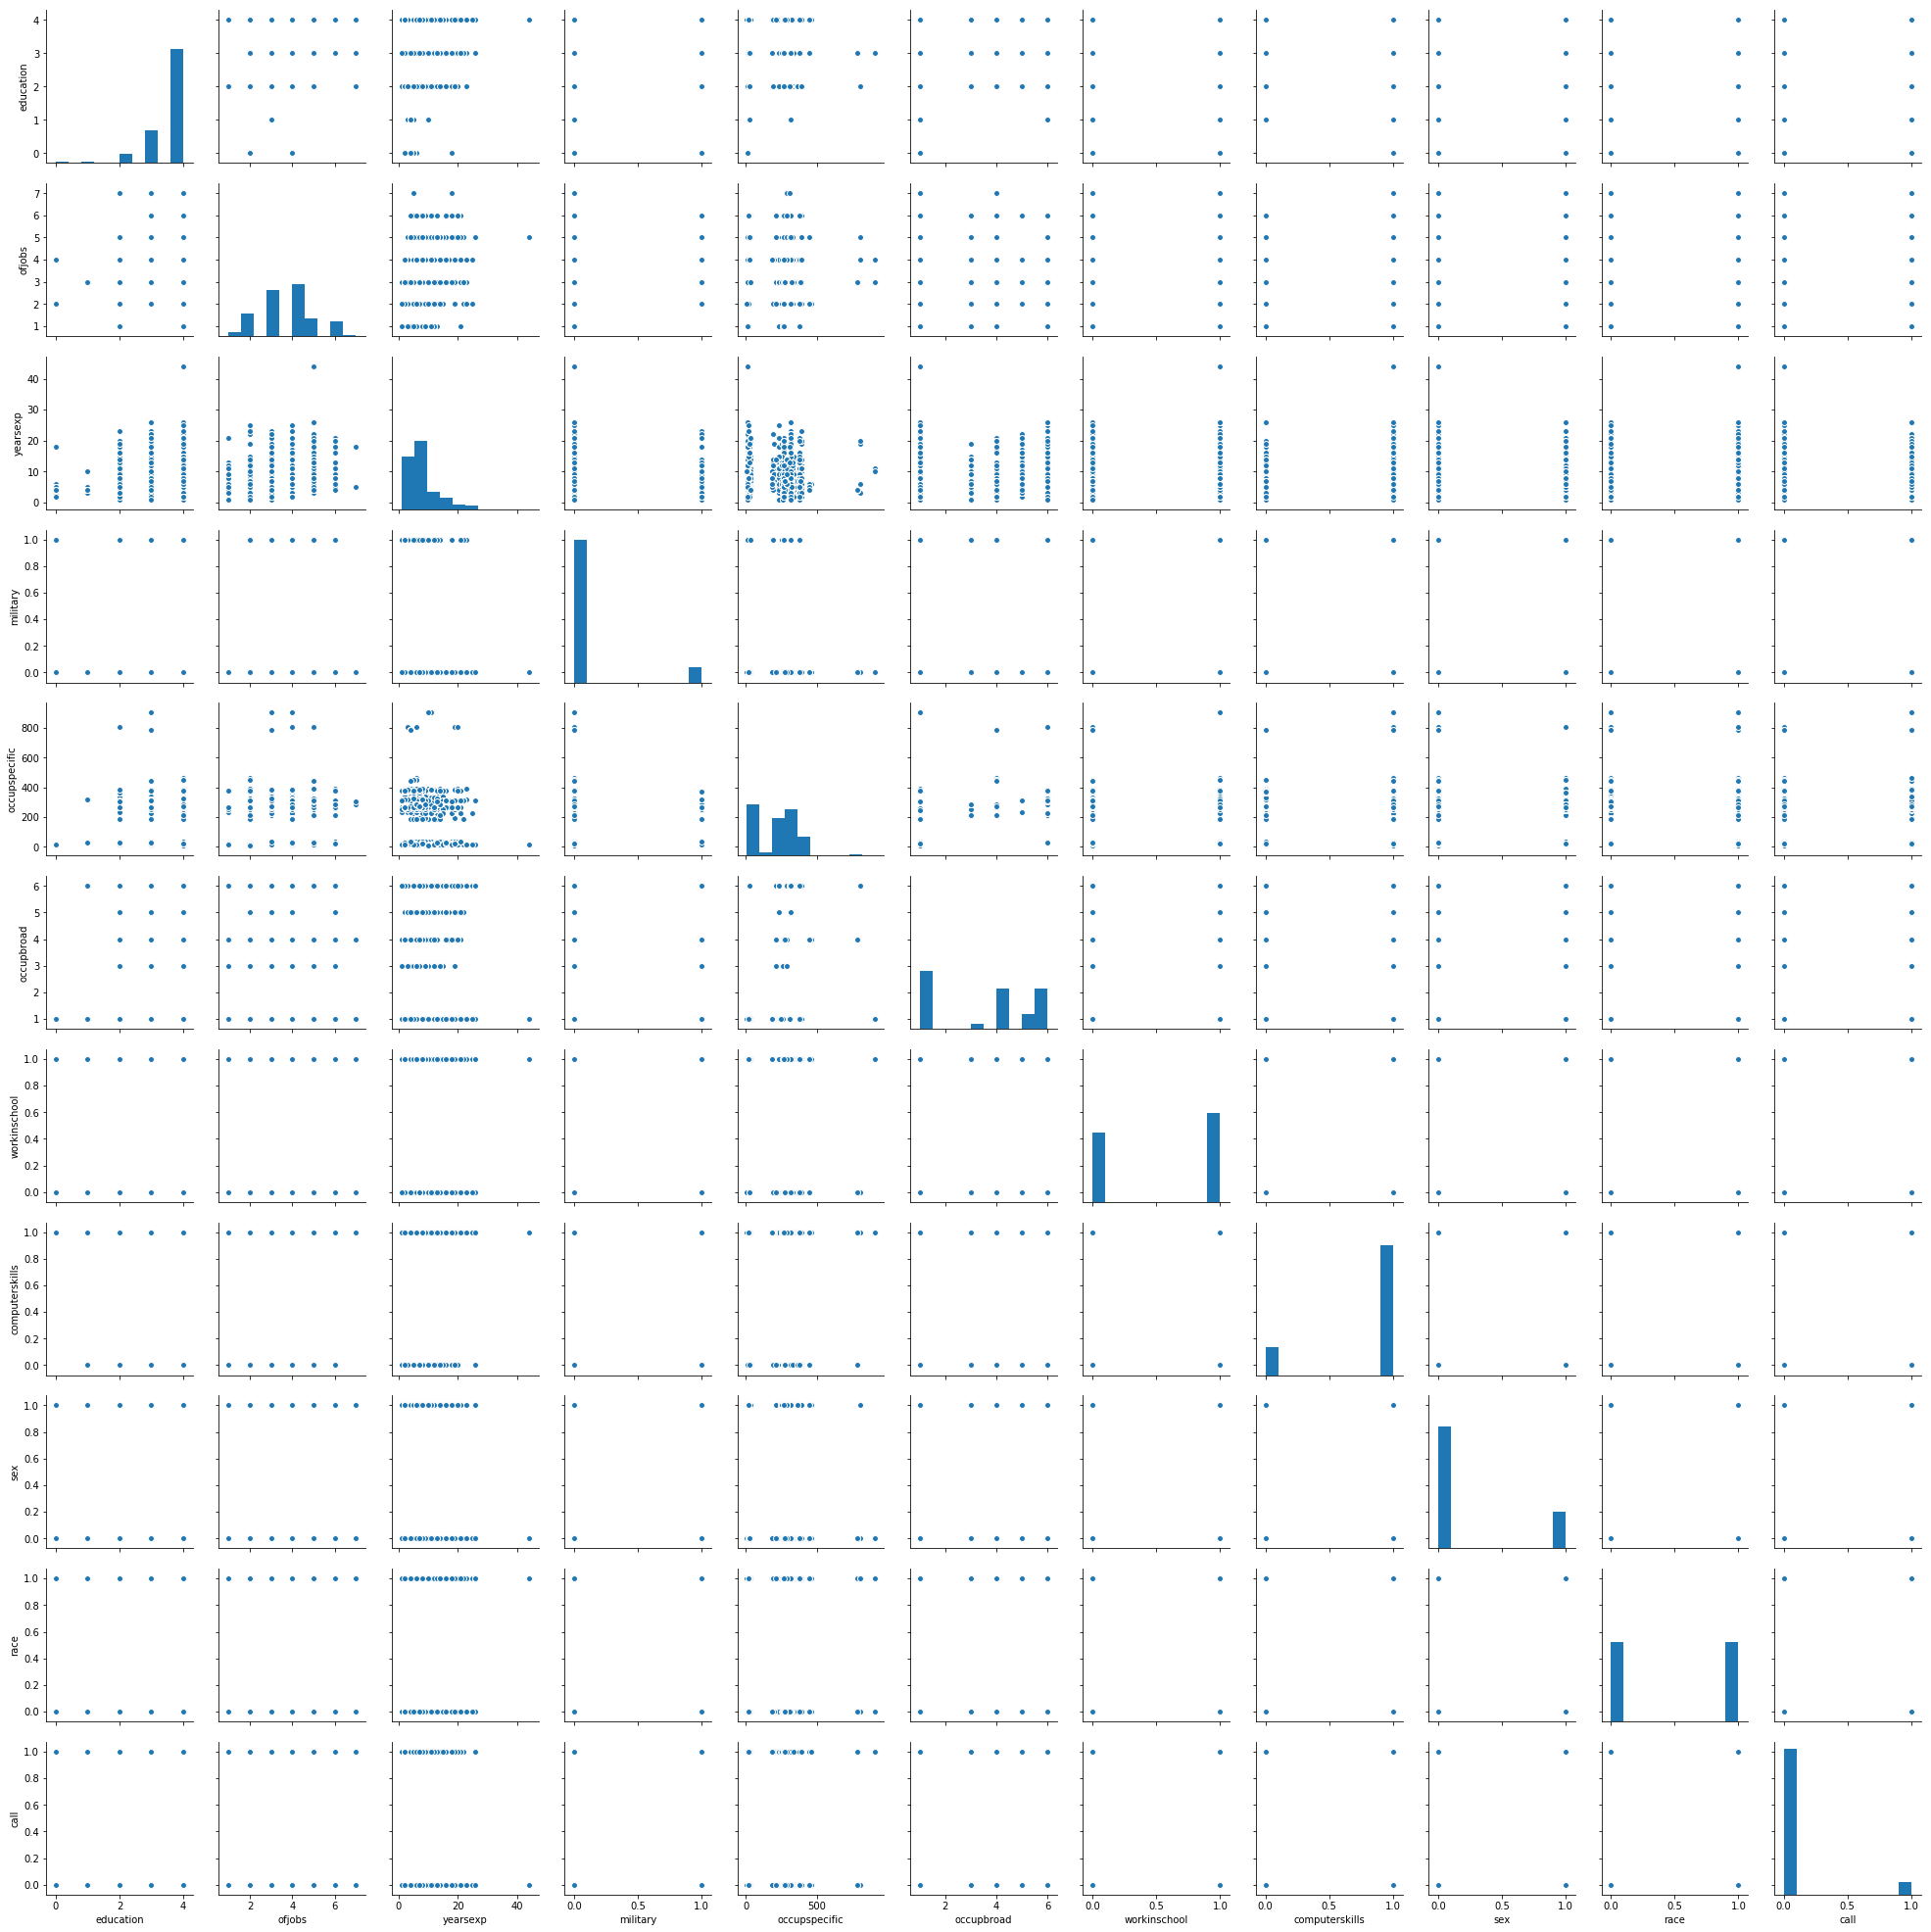

In [18]:
small_data = data[['education' , 'ofjobs' , 'yearsexp' , 'military' ,
'occupspecific' , 'occupbroad' , 'workinschool' ,'computerskills' 
, 'sex' ,'race' , 'call']]

sns.pairplot(small_data)
plt.show()